In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from dicom_data_pipeline import data_loader
from dicom_data_segmentation.segmentation import FixedThresholdSegmentation


            Doing FixedThresholdSegmentation on patient #0
            ###########################################################################################


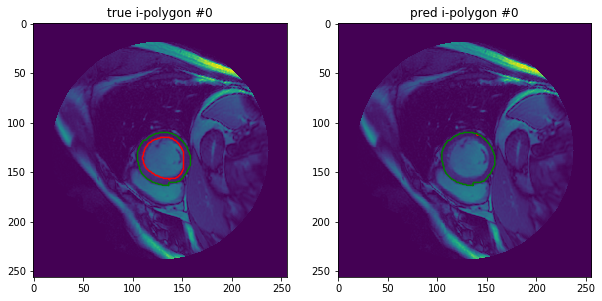

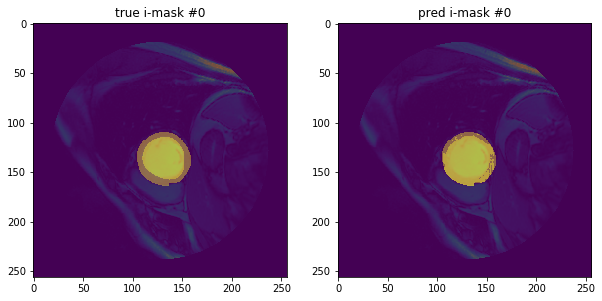

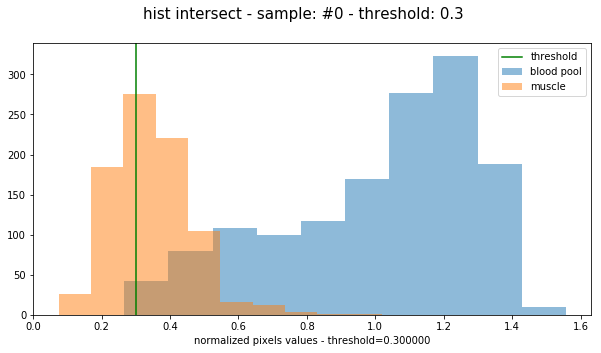


            Patient #0 data segmentation done in 1.32988095284 seconds.
            ###########################################################################################
            
            

            Doing FixedThresholdSegmentation on patient #1
            ###########################################################################################


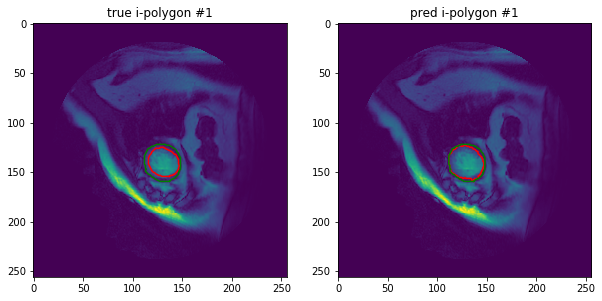

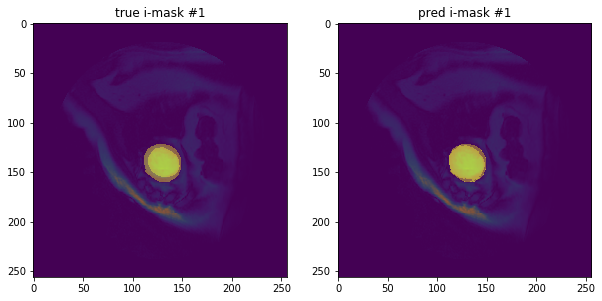

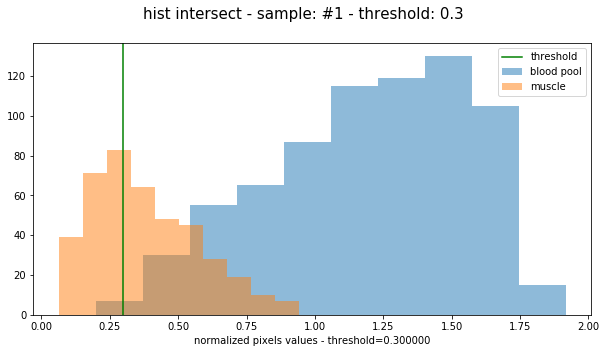


            Patient #1 data segmentation done in 1.20962095261 seconds.
            ###########################################################################################
            
            

            Doing FixedThresholdSegmentation on patient #2
            ###########################################################################################


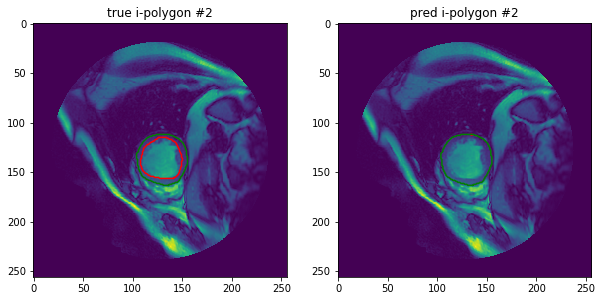

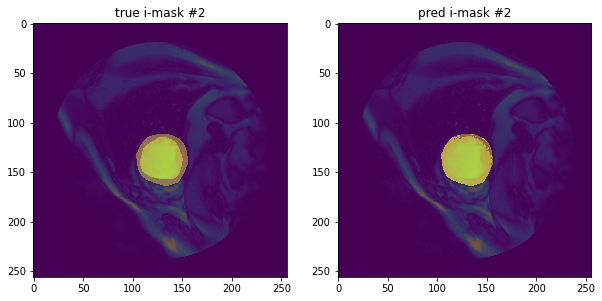

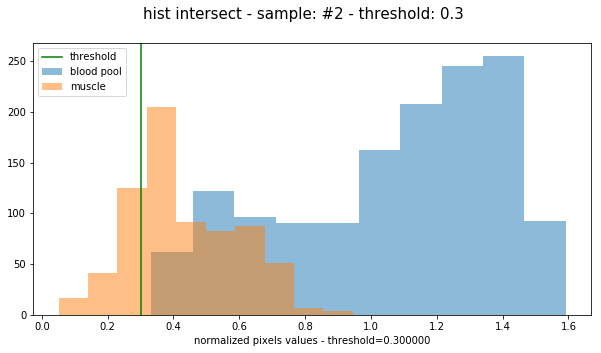


            Patient #2 data segmentation done in 1.33280897141 seconds.
            ###########################################################################################
            
            

            Doing FixedThresholdSegmentation on patient #3
            ###########################################################################################


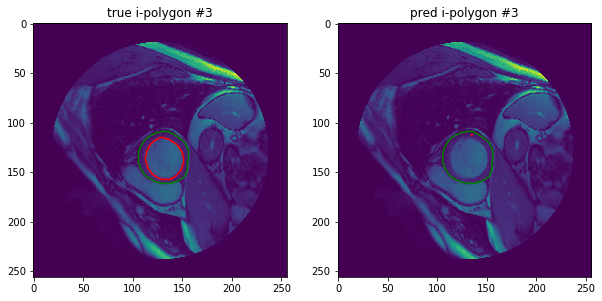

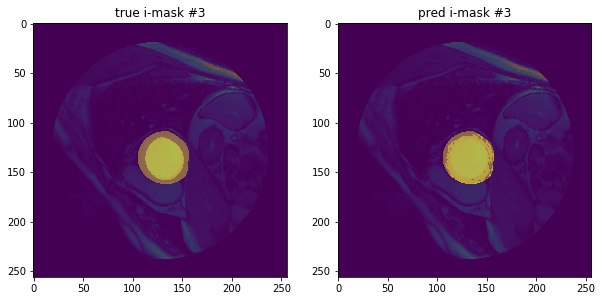

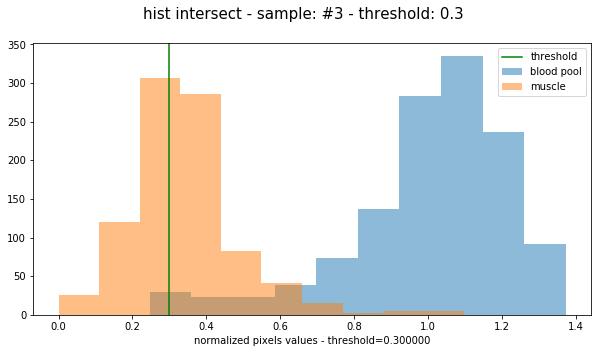


            Patient #3 data segmentation done in 1.15954208374 seconds.
            ###########################################################################################
            
            

            Doing FixedThresholdSegmentation on patient #4
            ###########################################################################################


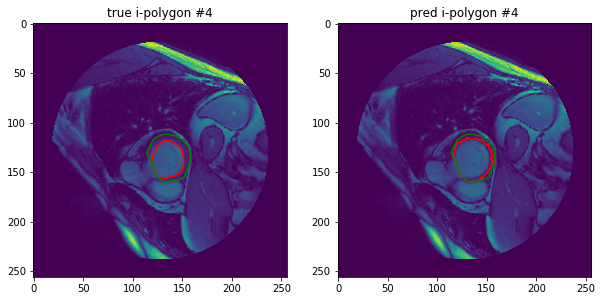

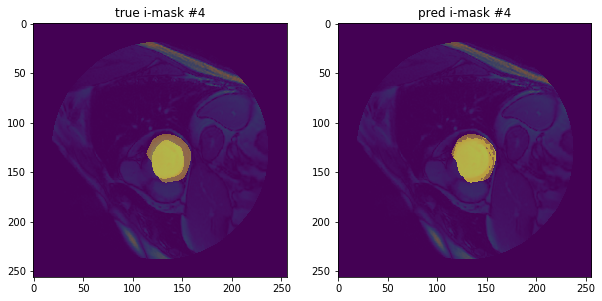

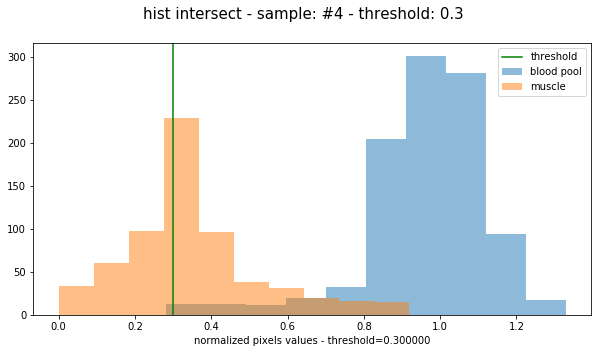


            Patient #4 data segmentation done in 1.33983302116 seconds.
            ###########################################################################################
            
            

            Doing FixedThresholdSegmentation on patient #5
            ###########################################################################################


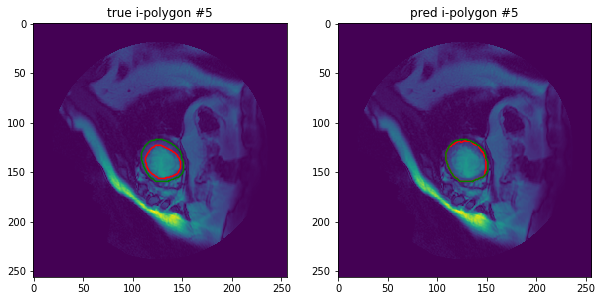

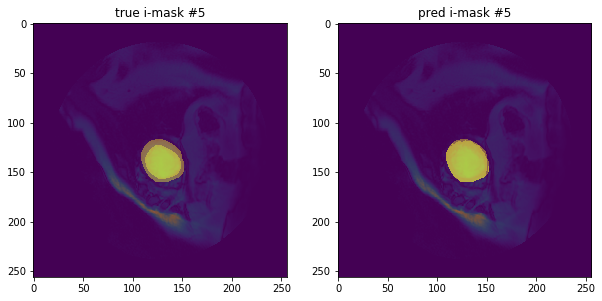

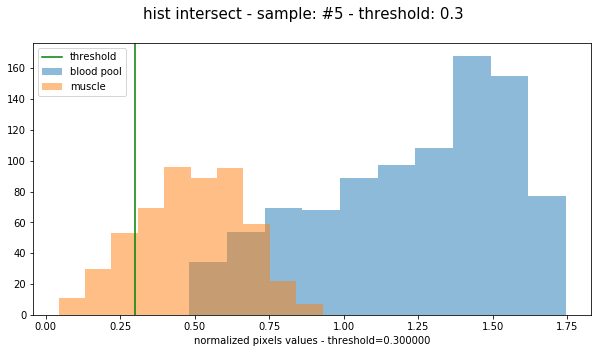


            Patient #5 data segmentation done in 1.39647698402 seconds.
            ###########################################################################################
            
            

            Doing FixedThresholdSegmentation on patient #6
            ###########################################################################################


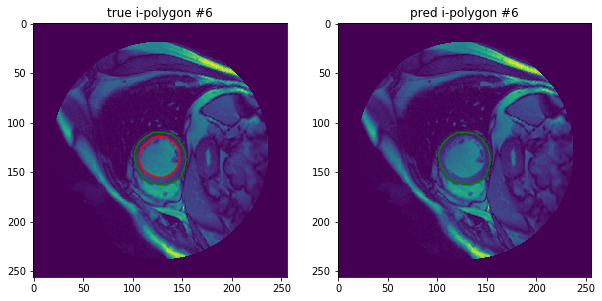

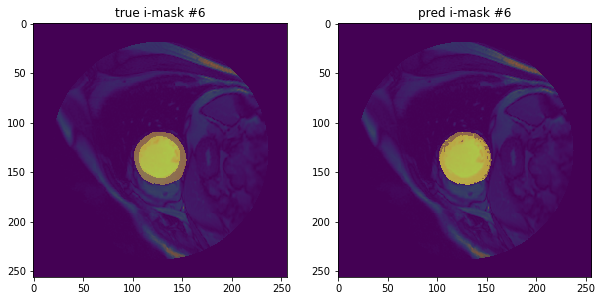

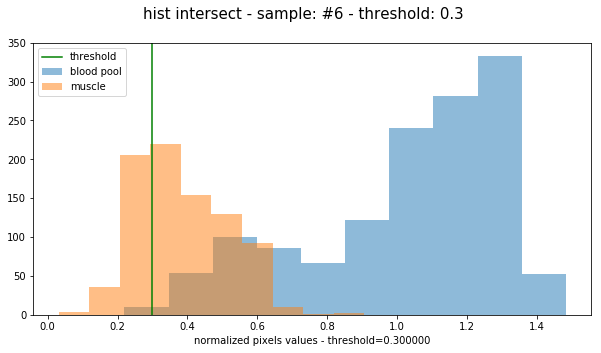


            Patient #6 data segmentation done in 1.82988810539 seconds.
            ###########################################################################################
            
            

            Doing FixedThresholdSegmentation on patient #7
            ###########################################################################################


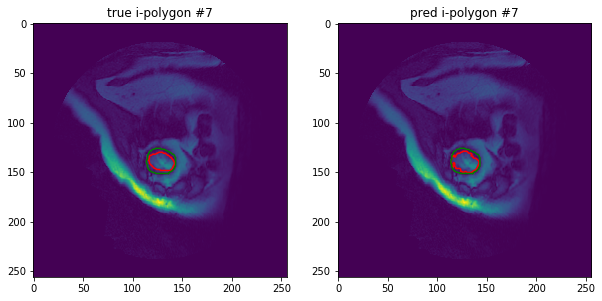

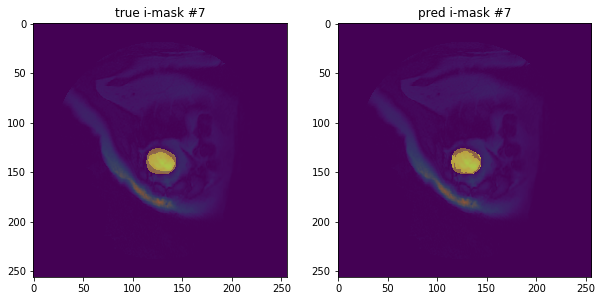

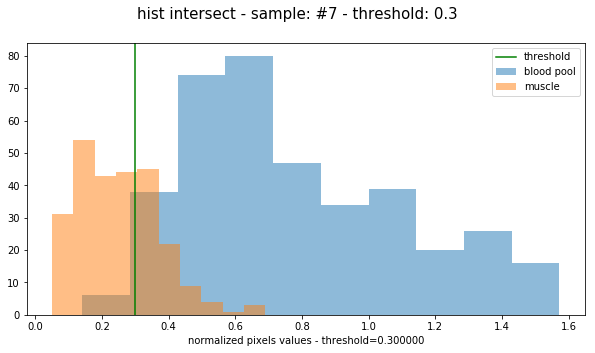


            Patient #7 data segmentation done in 1.38784193993 seconds.
            ###########################################################################################
            
            

            Doing FixedThresholdSegmentation on patient #8
            ###########################################################################################


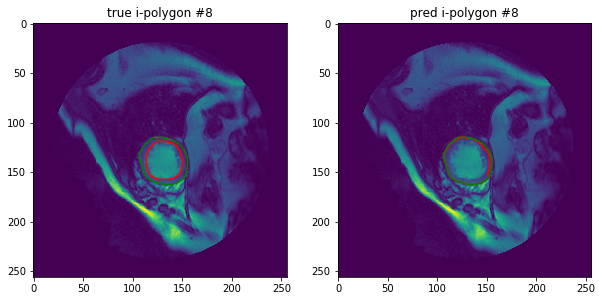

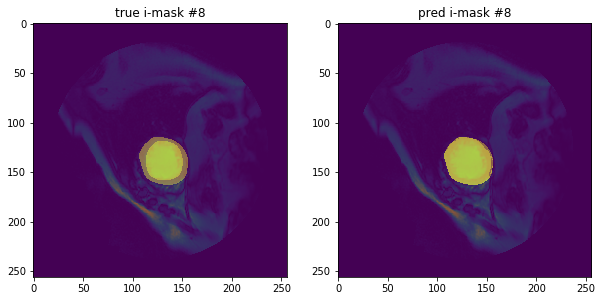

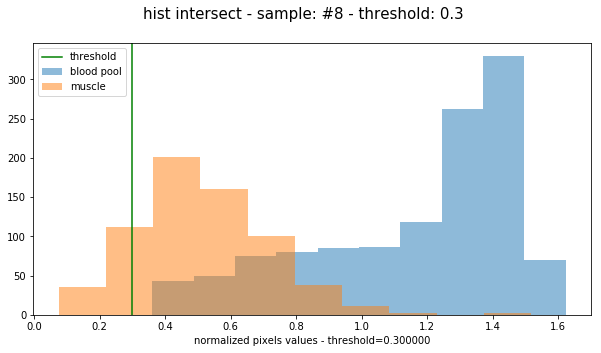


            Patient #8 data segmentation done in 1.8842318058 seconds.
            ###########################################################################################
            
            

            Doing FixedThresholdSegmentation on patient #9
            ###########################################################################################


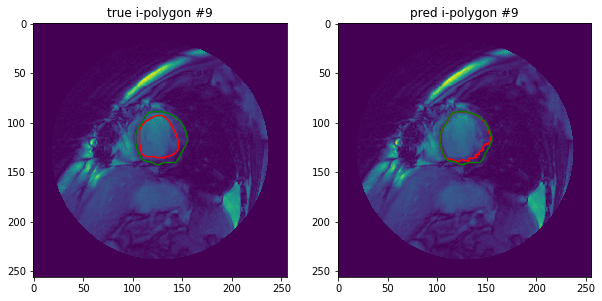

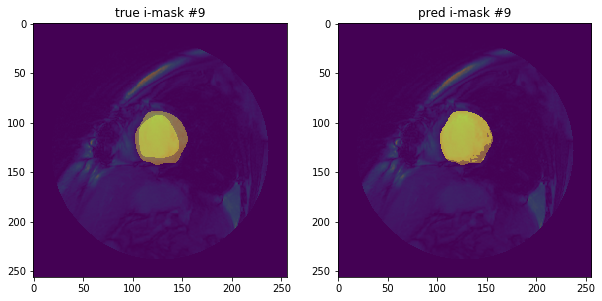

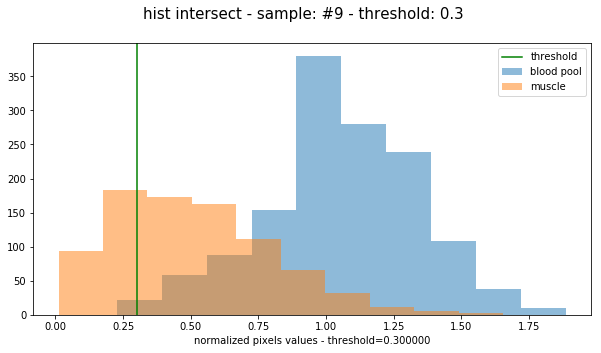


            Patient #9 data segmentation done in 2.17923903465 seconds.
            ###########################################################################################
            
            

            Doing FixedThresholdSegmentation on patient #10
            ###########################################################################################


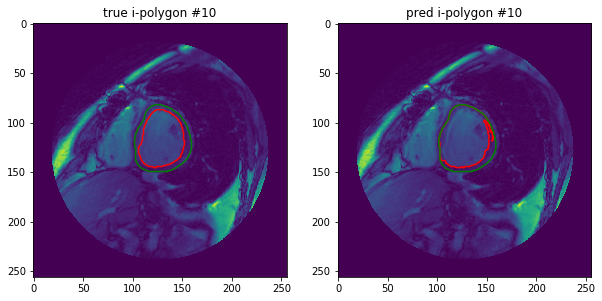

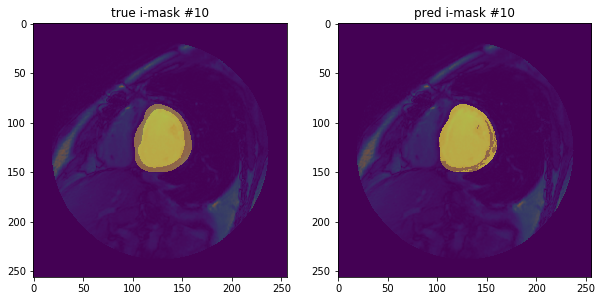

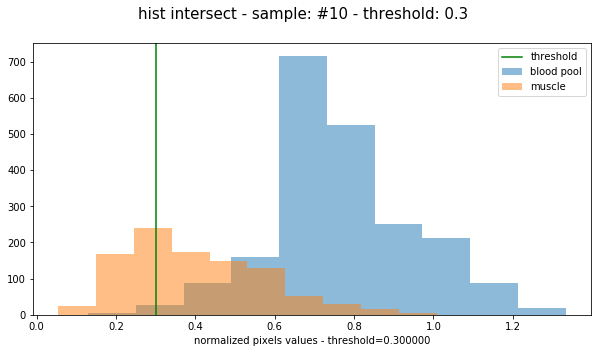


            Patient #10 data segmentation done in 1.48480796814 seconds.
            ###########################################################################################
            
            

            Doing FixedThresholdSegmentation on patient #11
            ###########################################################################################

            Patient #11 data segmentation done in 0.795339107513 seconds.
            ###########################################################################################
            
            

            Doing FixedThresholdSegmentation on patient #12
            ###########################################################################################

            Patient #12 data segmentation done in 0.531868219376 seconds.
            ###########################################################################################
            
            

            Doing FixedThresholdSegmentation on patient


            Doing FixedThresholdSegmentation on patient #32
            ###########################################################################################

            Patient #32 data segmentation done in 0.480319976807 seconds.
            ###########################################################################################
            
            

            Doing FixedThresholdSegmentation on patient #33
            ###########################################################################################

            Patient #33 data segmentation done in 0.482039928436 seconds.
            ###########################################################################################
            
            

            Doing FixedThresholdSegmentation on patient #34
            ###########################################################################################

            Patient #34 data segmentation done in 0.497163057327 seconds.
            ########

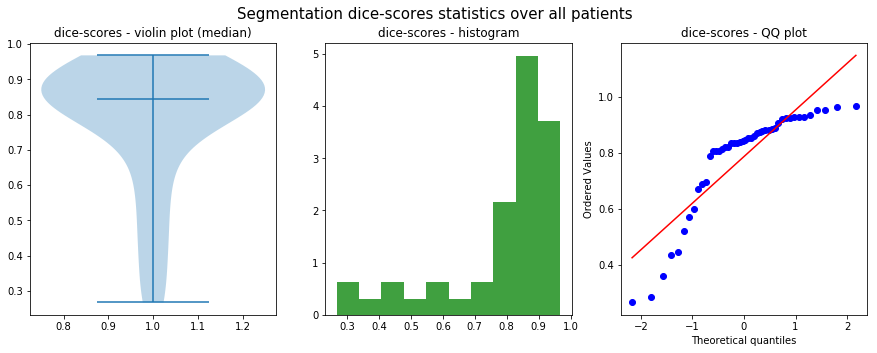

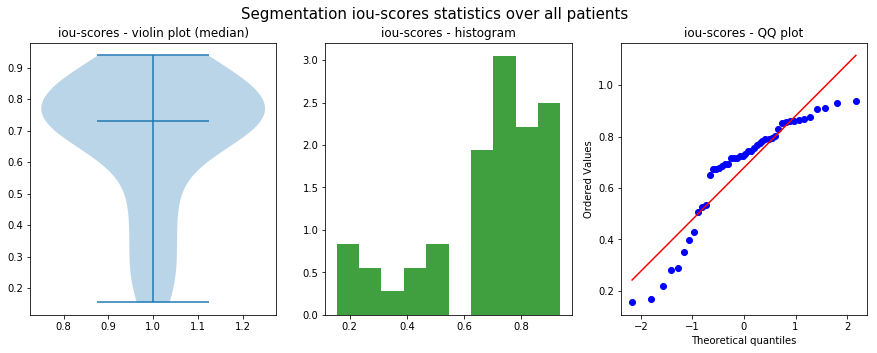

In [2]:
get_data_iterator = lambda : \
    data_loader.DicomMasksDataset(img_masks_filepath='_data/image-masks.i-contours.o-contours.csv')
    
FixedThresholdSegmentation(
    data_iterator = get_data_iterator(),
    segmentation_method = FixedThresholdSegmentation.__name__,
    plots_prefix = '_plots',
    results_prefix = '_results'
).fit(show_plots=True, max_plots=10)

# Results Analysis:

##  Intro:

- Our goal is to answer the question : could you use a simple thresholding scheme to automatically create the i-contours, given the o-contours?

- After viewing few images we clearly see a disparity in pixels intensity between the blood pool and the muscle.

- Hence, the intuition at first glance is to answer YES WE CAN !

- But since we are (data) scientist we want CLEAR and IRREFUTABLE evidences to support this claim.

- Consequently, in the following sections we perform both qualitative and quantitative analysis to verify this assumption.


## Segmentation method :   FixedThresholdSegmentation

- Before jumping to the analysis, few words on this segmentation method:
- This notebook perform segmentation using a fix threshold on the normalized pixels intensity of  0.3 .
- The images were normalized (divided by 255) to diminush the effect of intensity/luminosity between devices for instance.
- This threshold(0.3) was chosen manually after looking at blood_pool_pixels_histogram vs muscle_pixels_histogram plotted one on top of the other.
- The notebook FlexibleThresholdSegmentation.ipynb walks you through a method were we use a local threshold per image.
- The notebook ComparativeAnalysis.ipynb walks you through the comparison of the results obtained with this method to others I've tried.


## Qualitative analysis:

- In addition to the histograms mentionned aboved, we also plotted the the ground-thruth i-contour/mask with the predicted i-contour/mask . (just plotted 10 above to keep the notebook slim, change the parameter max_plots for more)
- This enables us to check for few images that basic threshold segmentation "MAY" indeed be used/useful.



## Quantitative analysis:

- We have computed the classic dice_coefficient and intersection_over_union metrics on each sample to quantify how good this approach is.
- Using those scores we perform some descriptive statistics on their distribution. And here are the results:
 
     Quantitative Statistics on Scores:
            dice_scores stats :
                DescribeResult(nobs=46, minmax=(0.2675736961451247, 0.9683143219264893), mean=0.7867835838462787, variance=0.03306933416369388, skewness=-1.5445847471321748, kurtosis=1.4027470919692062)
            dice_scores median :
                0.843272210397
                
                
            Intersection_over_Union_scores stats:
                DescribeResult(nobs=46, minmax=(0.1544502617801047, 0.9385749385749386), mean=0.6790402681785203, variance=0.044160598044945376, skewness=-1.1327314411773746, kurtosis=0.31451899709813524)
             Intersection_over_Union_scores median :
                0.729023028703
                
- skewness is negative, and pretty high(in absolute-value) -> a distribution of scores close to 1.0.
- Also, The median for both scores(dice and IOU) is pretty high for the small effort invested (0.84, 0.73 respectively).
- This numbers are also confirmed by the violin and histogram plots where we see a very skewed distribution of scores.

- What about the QQ-plots?

- QQ-plots enables us to confirm that the scores distributions aren't Gaussian (since points aren't aligned on the first-diagonal), which will have an impact on which kind of statistics-test to use when comparing different approaches. More in the notebook: ComparativeAnalysis.ipynb




## Conclusion:

- With these analysis, numbers and plots we can convince a non-expert that FixedThresholdSegmentation does a pretty good job at segmenting blood pool and muscles.

- Can we improve the results by using a local threshold per image ?

- That's the answer we'll answer in the notebook: FlexibleThresholdSegmentation.ipynb